# Анализ данных онлайн-магазина

**Цель**: дать руководству аналитически обоснованные рекомендации по оптимизации деятельности.

**Задачи**: проанализировать данные реализации продаж онлайн-магазина для оценки прибыльности и выявления точек роста.

In [292]:
import pandas as pd
import matplotlib.figure 
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np

In [293]:
df = pd.read_excel('/Users/marina/Downloads/Superstore.xls')

**Обзор данных**

In [294]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [296]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

**Предобработка данных**

In [297]:
# Удаление неактуальных для анализа столбцов 
df = df.drop(df.columns[[0, 6, 11, 12, 16]], axis=1)

In [298]:
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country/Region,City,State,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,FUR-FU-10001889,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,FUR-FU-10000747,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,TEC-PH-10003645,Technology,Phones,258.576,2,0.2,19.3932
9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,OFF-PA-10004041,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,CA-2019-119914,2019-05-04,2019-05-09,Second Class,CC-12220,Consumer,United States,Westminster,California,OFF-AP-10002684,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [299]:
# Проверка на дубликаты
df.duplicated().sum()

1

In [300]:
# Удаление дубликатов
df = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

In [301]:
# Проверка на tbd значения
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Segment           0
Country/Region    0
City              0
State             0
Product ID        0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

## Исследовательский анализ данных

**Исследование прибыльности подкатегорий продаж**

In [302]:
sub_cat_sales = df.groupby('Sub-Category').sum()

In [303]:
sub_cat_profit = sub_cat_sales['Profit'].sort_values(ascending = False)

In [304]:
print(sub_cat_profit)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26602.2251
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


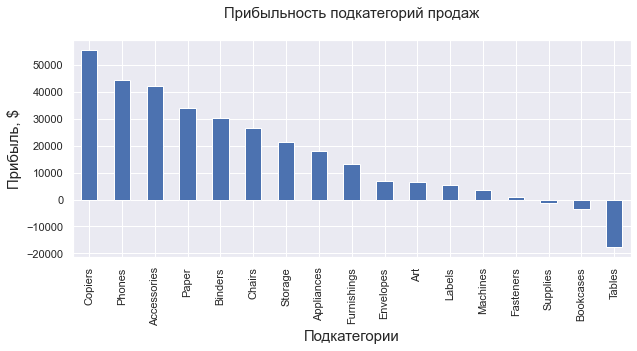

In [305]:
fig = plt.figure()
sub_cat_profit.plot(kind='bar', alpha=1)
plt.title('Прибыльность подкатегорий продаж'+ "\n", fontsize = 15)
plt.xlabel('Подкатегории', fontsize = 15)
plt.ylabel('Прибыль, $', fontsize = 15)
fig.set_size_inches(10, 4) 

**Подкатегории, приносящие компании наибольшую прибыль**

In [306]:
print(sub_cat_sales.sort_values(by = 'Profit', ascending = False).head(3))

                   Sales  Quantity  Discount      Profit
Sub-Category                                            
Copiers       149528.030       234      11.0  55617.8249
Phones        330007.054      3289     137.4  44515.7306
Accessories   167380.318      2976      60.8  41936.6357


**Подкатегории, приносящие компании убытки**

In [307]:
unprofitable_positions = sub_cat_sales[sub_cat_sales['Profit'] < 0].sort_values(by = 'Profit')
print(unprofitable_positions)

                    Sales  Quantity  Discount      Profit
Sub-Category                                             
Tables        206965.5320      1241     83.35 -17725.4811
Bookcases     114879.9963       868     48.14  -3472.5560
Supplies       46673.5380       647     14.60  -1189.0995


In [308]:
unprofitable_positions_count = df[df['Profit'] < 0]['Profit'].count()
unprofitable_positions_sum = abs(df[df['Profit'] < 0]['Profit'].sum())
print('За расченый период выявлено {} убыточных сделок на общую сумму в $ {}'.format(unprofitable_positions_count, unprofitable_positions_sum) )

За расченый период выявлено 1870 убыточных сделок на общую сумму в $ 156119.2269


In [309]:
df['Profit'].describe()

count    9993.000000
mean       28.660971
std       234.271476
min     -6599.978000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

**Оценка прибыльности продаж по штатам**

In [310]:
state_sales = df.groupby('State').sum().sort_values(by = 'Profit', ascending = False)
print(state_sales)

                            Sales  Quantity  Discount      Profit
State                                                            
California            457687.6315      7667    145.60  76381.3871
New York              310876.2710      4224     62.40  74038.5486
Washington            138641.2700      1883     32.40  33402.6517
Michigan               76269.6140       946      1.80  24463.1876
Virginia               70636.7200       893      0.00  18597.9504
Indiana                53555.3600       578      0.00  18382.9363
Georgia                49095.8400       705      0.00  16250.0433
Kentucky               36591.7500       523      0.00  11199.6966
Minnesota              29863.1500       331      0.00  10823.1874
Delaware               27451.0690       367      0.60   9977.3748
New Jersey             35764.3120       454      0.60   9772.9138
Wisconsin              32114.6100       463      0.00   8401.8004
Rhode Island           22627.9560       199      1.20   7285.6293
Maryland  

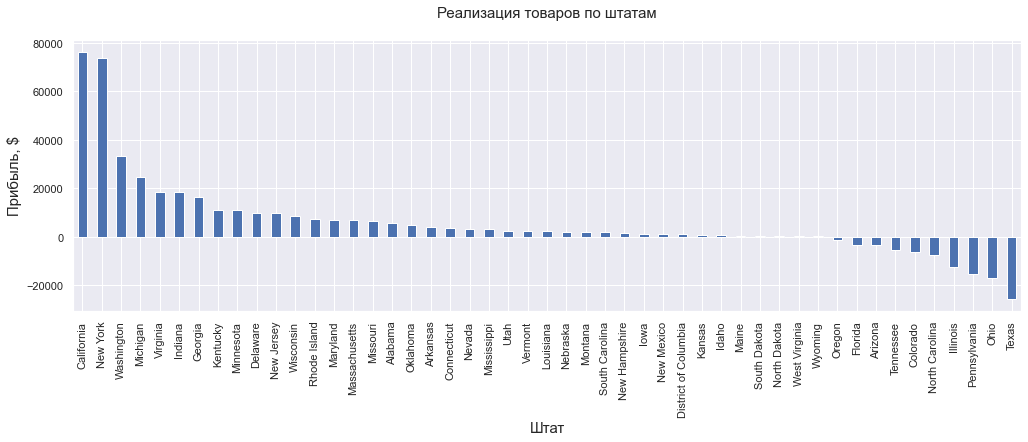

In [311]:
state_profit = state_sales['Profit']
fig = plt.figure()
state_profit.plot(kind='bar', alpha=1) 
plt.title('Реализация товаров по штатам'+ "\n", fontsize = 15)
plt.xlabel('Штат', fontsize = 15)
plt.ylabel('Прибыль, $', fontsize = 15)
fig.set_size_inches(17, 5) 

### Выводы. 
* Самые доходные подкатегории продаж - ксероксы, телефоны, аксессуары
* Убыточные подкатегории продаж - столы, книжные шкафы и оффисные принадлежности
* Медианная прибыль с продажи товара - около 9$
* Больше всего прибыли приносят штаты Калифорния, Нью-Йорк, Вашингтон
* Убытки приносят продажи, реализуемые в штатах Орегон, Флорида, Аризона, Тенесси, Колорадо, Северная Каролина, Иллинойс, Пенсильвания,Огайо, Техас. Стоит проанализировать и пересмотреть стратегию продаж в данных регионах для увеличения показателя прибыли. 


## Анализ системы скидок

Размеры скидок, предоставленных клиенам за весь изучаемый период:

In [312]:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [313]:
big_discounts = df[df['Discount'] > 0.5]['Sub-Category'].unique()
print(big_discounts)

['Appliances' 'Binders' 'Furnishings' 'Machines' 'Bookcases']


Самые большие скидки (более 50% от цены товара) были предоставлены категориям "Бытовая техника", "Переплетчики", "Мебель", "Книжные шкафы", "Машины".

С помощью графика отобразим зависимость прибыли от величины скидки. 

In [314]:
x = df['Discount']
y = df['Profit']

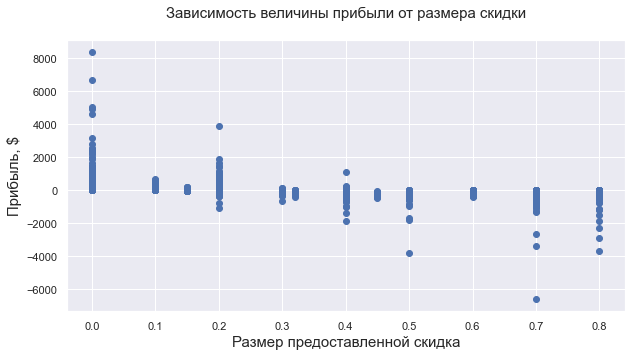

In [315]:
fig = plt.figure()
plt.scatter(x, y)
plt.title('Зависимость величины прибыли от размера скидки'+ "\n", fontsize = 15)
plt.xlabel('Размер предоставленной скидка', fontsize = 15)
plt.ylabel('Прибыль, $', fontsize = 15)
fig.set_size_inches(10, 5)

### Выводы.
Можно наблюдать некоторую обратную взаимосвязь: чем ниже скидка, тем больше прибыли приносит приобретенный товар. Рекоммендуется пересмотреть систему больших скидок, так как она не релевантна для компании и может нанести ей урон в виде больших убытков.

## Анализ сегментов и системы доставки

Рассмотрим имеющиеся сегменты клиентов

In [316]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [317]:
df.groupby('Segment').count()['Order ID']

Segment
Consumer       5191
Corporate      3020
Home Office    1782
Name: Order ID, dtype: int64

В основном, клиентами онлайн-магазина являются физические и юридические лица. 

In [318]:
df.groupby('Segment').sum()['Profit']

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60310.7373
Name: Profit, dtype: float64

Большую прибыль приносят физические лица

In [319]:
consumer_ship_mode = df[df['Segment'] == 'Consumer'].groupby('Ship Mode')['Order ID'].count()
consumer_ship_mode.sort_values(ascending = False)

Ship Mode
Standard Class    3085
Second Class      1020
First Class        769
Same Day           317
Name: Order ID, dtype: int64

Чаще всего физические лица выбирают стандартную доставку товаров, реже всего - доставку в "тот же день".

In [320]:
consumer_ship_mode = df[df['Segment'] == 'Corporate'].groupby('Ship Mode')['Order ID'].count()
consumer_ship_mode.sort_values(ascending = False)

Ship Mode
Standard Class    1812
Second Class       609
First Class        485
Same Day           114
Name: Order ID, dtype: int64

Среди корпоративных клиентов так же самым популярным типом доставки является стандартная,а самым редко запрашиваемым - доставка "в тот же день".

In [321]:
df['Delivery Time'] = df['Ship Date'] - df['Order Date']
df['Delivery Time'].describe()

count                         9993
mean     3 days 22:59:37.304112879
std      1 days 17:57:09.266822052
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Delivery Time, dtype: object

В среднем заказы доставляются за 3 дня. Максимальная скорость доставки - в тот же день, минимальная - за неделю.

### Выводы.
* Основной доходный сегмент онлайн-магазина - физические лица. Имеется потенциал для расширения сегмента путем привлечения новых корпоративных клиентов. 
* Чаще всего клиенты предпочитают стандартную доставку, реже всего - доставку "в тот же день".
* Большинство товаров доставляется клиентам в течение 5 дней. Минимальная скорость доставки - 7 дней, что говорит о хорошем функционировании системы доставки.